# Table of Contents
 <p><div class="lev1"><a href="#Dataset-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset description</a></div><div class="lev1"><a href="#Decision-Trees-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Decision Trees</a></div><div class="lev2"><a href="#Trees-on-the-Banana-Dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Trees on the Banana Dataset</a></div><div class="lev3"><a href="#Modify-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Modify</a></div><div class="lev3"><a href="#Run-your-code-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Run your code</a></div><div class="lev3"><a href="#Plot-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Plot</a></div><div class="lev3"><a href="#[Optional]-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>[Optional]</a></div><div class="lev1"><a href="#AdaBoost-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>AdaBoost</a></div><div class="lev2"><a href="#Implementation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Implementation</a></div><div class="lev3"><a href="#Implement-AdaBoost-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Implement AdaBoost</a></div><div class="lev3"><a href="#[Optional]-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>[Optional]</a></div><div class="lev3"><a href="#Plot-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Plot</a></div><div class="lev1"><a href="#Gradient-Boosting-Machines-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gradient Boosting Machines</a></div><div class="lev2"><a href="#Bias-Function-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Bias Function</a></div><div class="lev2"><a href="#Classification-Framework-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Classification Framework</a></div><div class="lev1"><a href="#From-Margins-to-Conditional-Probabilities-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>From Margins to Conditional Probabilities</a></div><div class="lev2"><a href="#Expectation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Expectation</a></div><div class="lev2"><a href="#Question-2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Question 2</a></div><div class="lev2"><a href="#Question-3-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Question 3</a></div><div class="lev2"><a href="#[Optional]-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>[Optional]</a></div><div class="lev1"><a href="#AdaBoost-Actually-Works-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>AdaBoost Actually Works</a></div><div class="lev2"><a href="#Exponential-bound-on-the-training-loss-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Exponential bound on the training loss</a></div><div class="lev3"><a href="#Question-1-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Question 1</a></div><div class="lev3"><a href="#Question-2-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Question 2</a></div><div class="lev3"><a href="#Question-3-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Question 3</a></div><div class="lev3"><a href="#Question-4-6.1.4"><span class="toc-item-num">6.1.4&nbsp;&nbsp;</span>Question 4</a></div><div class="lev3"><a href="#Question-5-6.1.5"><span class="toc-item-num">6.1.5&nbsp;&nbsp;</span>Question 5</a></div><div class="lev3"><a href="#Conclude-the-proof-6.1.6"><span class="toc-item-num">6.1.6&nbsp;&nbsp;</span>Conclude the proof</a></div><div class="lev1"><a href="#AdaBoost-is-FSAM-With-Exponential-Loss-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>AdaBoost is FSAM With Exponential Loss</a></div><div class="lev2"><a href="#Question-1-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Question 1</a></div><div class="lev2"><a href="#Question-2-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Question 2</a></div><div class="lev2"><a href="#Question-3-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Question 3</a></div><div class="lev2"><a href="#Question-4-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Question 4</a></div>

_DS-GA 1003: Machine Learning and Computational Statistics_

Homework 5: Trees and Boosting

In [1]:
from __future__ import division,print_function
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import grid_search
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
%matplotlib inline  

# Dataset description

You will be working with a simple two-feature binary dataset, known as the Banana dataset. The data consists of 5,300 instances, which have been split into 3,500 training points and 1,800 test points for this assignment. The csv files are included in the data directory. Each row corresponds to a data point - the first entry of the row gives the class label, and the next two entries give the values of the attributes.

In [2]:
train = pd.read_csv('data/banana_train.csv',header=None)
test = pd.read_csv('data/banana_test.csv',header=None)

In [3]:
train.head()

,0,1,2
0,-1,0.93078,0.783450
1,1,1.42000,-0.696970
2,-1,-0.38296,-1.043200
3,1,-1.28100,-0.542390
4,1,-0.14859,-0.018478


In [4]:
test.head()

,0,1,2
0,-1,-1.18790,-1.318000
1,-1,0.35087,-0.964450
2,-1,0.14921,1.978600
3,-1,1.66900,0.087693
4,-1,-0.75283,1.098700


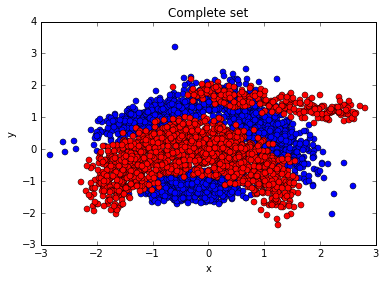

In [5]:
# Visualize
label1 = train[train.iloc[:,0]==-1].index
label2 = train[train.iloc[:,0]==1].index
x = train.iloc[:,1]
y = train.iloc[:,2]
plt.plot(x[label1],y[label1], 'bo', x[label2], y[label2], 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Complete set')

# Decision Trees

## Trees on the Banana Dataset

The official sklearn documentation provides code that constructs a decision tree and visualizes the decision boundary on the “Iris dataset” (http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#example-tree-plot-iris-py). Note that the sklearn implementation of decision trees is a bit different from that described in lecture: they just build to a certain depth, without a pruning step.

### Modify

Modify the code referenced above to work on the Banana dataset. The default class labels are -1 and 1 in the given data files, but for the visualization code snippet to work, you will have to modify the class labels to 0 and 1. Note that the Iris dataset is a multiclass problem with 3 classes, while the Banana dataset is a binary dataset.


In [6]:
# Change label from -1 to 0
trainNewLabel = [1 if i==1 else 0 for i in train.iloc[:,0]]
testNewLabel = [1 if i==1 else 0 for i in test.iloc[:,0]]
train.ix[:,0] = trainNewLabel
test.ix[:,0] = testNewLabel
print("Train labels are {}.\n".format(train.iloc[:,0].unique()),
      "Test labels are {}.".format(test.iloc[:,0].unique()))

Train labels are [0 1].
 Test labels are [0 1].


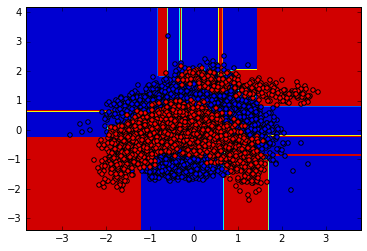

In [7]:
# Modify the code.

# Parameters
n_classes = 2
plot_colors = "bry"
plot_step = 0.02

# We only have 2 features for banana dataset, which are the 1&2 column.
X = train.iloc[:, [1,2]].values
y = train.iloc[:, 0].values

# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# Train
clf = DecisionTreeClassifier().fit(X, y)

# Plot the decision boundary

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z)
plt.axis("tight")

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx,0], X[idx,1], c=color, label=i,
                cmap=plt.cm.Paired)

### Run your code 
For different depths of decision trees, from 1 through 10, and briefly describe your observations of the decision surface visualization. [Use the default values for all other parameters.]


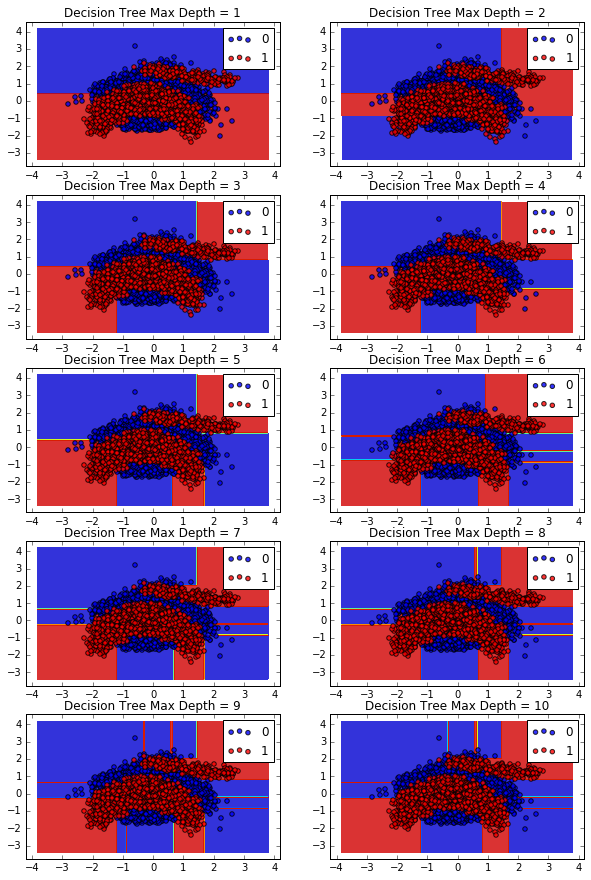

In [8]:
figure = plt.subplots(5,2,figsize=(10,15))
for i in range(1,11):
    # Modify the code.
    # Parameters
    n_classes = 2
    plot_colors = "bry"
    plot_step = 0.02

    # We only have 2 features for banana dataset, which are the 1&2 column.
    X = train.iloc[:, [1,2]].values
    y = train.iloc[:, 0].values

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier(max_depth=i).fit(X, y)

    # Plot the decision boundary
    plt.subplot(5, 2, i)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z,alpha=0.8)
    plt.axis("tight")

    for j, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == j)
        plt.scatter(X[idx,0], X[idx,1], c=color, label=j,
                    cmap=plt.cm.Paired,alpha=0.8)
        plt.title('Decision Tree Max Depth = {}'.format(i))
        plt.axis("tight")
    plt.legend()

With the increase in the Max-Depth of the decision tree, the decision tree surfaces tend to have more sub parts and cover more points.

### Plot
Plot the train and test errors as a function of the depth. Again, give a brief description of your observations.


In [9]:
depth = range(1,11)
trainErr = []
testErr = []
for d in range(1,11):
    # We only have 2 features for banana dataset, which are the 1&2 column.
    X_train = train.iloc[:, [1,2]].values
    y_train = train.iloc[:, 0].values
    X_test = test.iloc[:, [1, 2]].values
    y_test = test.iloc[:, 0].values

    # Shuffle
    idx = np.arange(X_train.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X_train = X_train[idx]
    y_train = y_train[idx]

    # Standardize
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    X_train = (X_train - mean) / std

    # Train
    clf = DecisionTreeClassifier(max_depth=d).fit(X_train, y_train)
    Z_train = clf.predict(X_train)
    Z_test = clf.predict(X_test)
    trainErr.append(roc_auc_score(y_train, Z_train))
    testErr.append(roc_auc_score(y_test, Z_test))

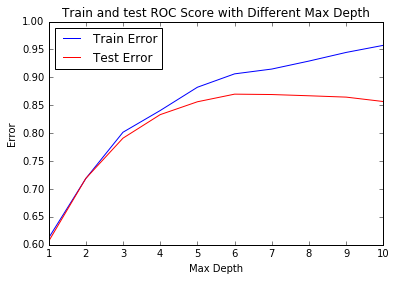

In [10]:
plt.plot(depth, trainErr, 'b-', label="Train Error")
plt.plot(depth, testErr, 'r-', label="Test Error")
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title("Train and test ROC Score with Different Max Depth")
plt.legend(loc="best")

In [11]:
opt = np.argmax(testErr)
print("The highet ROC score {0} occurs at Depth = {1}.".format(testErr[opt],depth[opt]))

The highet ROC score 0.869980126504 occurs at Depth = 6.


With Depth = 6, the highest ROC score is 0.870

### [Optional] 

Experiment with the other hyperparameters provided by DecisionTreeClassifier and find the combination giving the smallest test error. Summarize what you learn.

In [12]:
param_grid = {'max_depth': np.arange(3, 10),
             "min_samples_split":np.arange(10,30),
             "criterion":["entropy","gini"]}

tree = grid_search.GridSearchCV(DecisionTreeClassifier(), param_grid)

X_train = train.iloc[:, [1,2]].values
y_train = train.iloc[:, 0].values
X_test = test.iloc[:, [1, 2]].values
y_test = test.iloc[:, 0].values

# Shuffle
idx = np.arange(X_train.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X_train = X_train[idx]
y_train = y_train[idx]

# Standardize
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std

# Train

tree.fit(X_train, y_train)
tree_preds = tree.predict_proba(X_test)[:, 1]
tree_performance = roc_auc_score(y_test, tree_preds)

print('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))

DecisionTree: Area under the ROC curve = 0.943952233483


In [13]:
print("The highest ROC score = {0} occurs at parameters = {1}".format(tree_performance,tree.best_params_))

The highest ROC score = 0.943952233483 occurs at parameters = {'min_samples_split': 27, 'criterion': 'entropy', 'max_depth': 7}


# AdaBoost

## Implementation
In this problem, you will implement AdaBoost, one of the most popular techniques in ensemble
methods.

In [14]:
# Adaboost assume the base label to be +/- 1
train = pd.read_csv('data/banana_train.csv',header=None)
test = pd.read_csv('data/banana_test.csv',header=None)

###  Implement AdaBoost 
Implement AdaBoost for the Banana dataset with decision trees of depth 3 as the weak classifiers (also known as “base classifiers”). Use the decision tree implementation from sklearn as in 2.1. The fit function of DecisionTreeClassifier has a parameter sample weight, which you can use to weigh training examples differently during various rounds of AdaBoost.

In [15]:
X_train = train.iloc[:,[1,2]].values
y_train = train.iloc[:,0].values

# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# Set and store parameters
max_depth = 3
inds = []
alphas = []
predicts = []
n = len(X_train)
w0 = np.ones(n)/n

## Training    
for rd in range(10):
    clf = DecisionTreeClassifier(max_depth=max_depth).fit(X_train, y_train, sample_weight=w0)
    predict = clf.predict(X_train)
    # Indicator of misclassification
    ind = predict!=y_train
    # Error fraction
    err = np.mean(np.average(ind, weights=w0, axis=0))
    alpha = np.log((1-err)/err)
    w1 = w0*np.exp(alpha*ind)
    w0 = w1
    inds.append(sum(ind.astype(int)))
    alphas.append(alpha)
    predicts.append(predict)

In [16]:
from sklearn.metrics import roc_auc_score
result = np.zeros(n)
i = 0
for predict in predicts:
    result = result+alphas[i]*predict
    print("With {0} rounds of Adaboost, ROC score is {1}".format(i+1,roc_auc_score(np.sign(result),y_train)))
    i+=1

With 1 rounds of Adaboost, ROC score is 0.825425208966
With 2 rounds of Adaboost, ROC score is 0.825425208966
With 3 rounds of Adaboost, ROC score is 0.844869526758
With 4 rounds of Adaboost, ROC score is 0.857394222614
With 5 rounds of Adaboost, ROC score is 0.874120233455
With 6 rounds of Adaboost, ROC score is 0.870747881302
With 7 rounds of Adaboost, ROC score is 0.884608688595
With 8 rounds of Adaboost, ROC score is 0.894170771757
With 9 rounds of Adaboost, ROC score is 0.89305824238
With 10 rounds of Adaboost, ROC score is 0.894581906682


In [17]:
from sklearn.ensemble import AdaBoostClassifier
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=10,
    learning_rate=1,
    algorithm='SAMME')
bdt_real.fit(X_train, y_train)
roc_auc_score(bdt_real.predict(X_train),y_train)

0.89458190668209625

### [Optional] 
Visualize the AdaBoost training procedure for different numbers of rounds from 1 through 10. Plot the decision surface, and the training examples, such that training samples with larger weights in any round are represented as larger points compared to those with smaller weights. Provide a brief description of your observations.

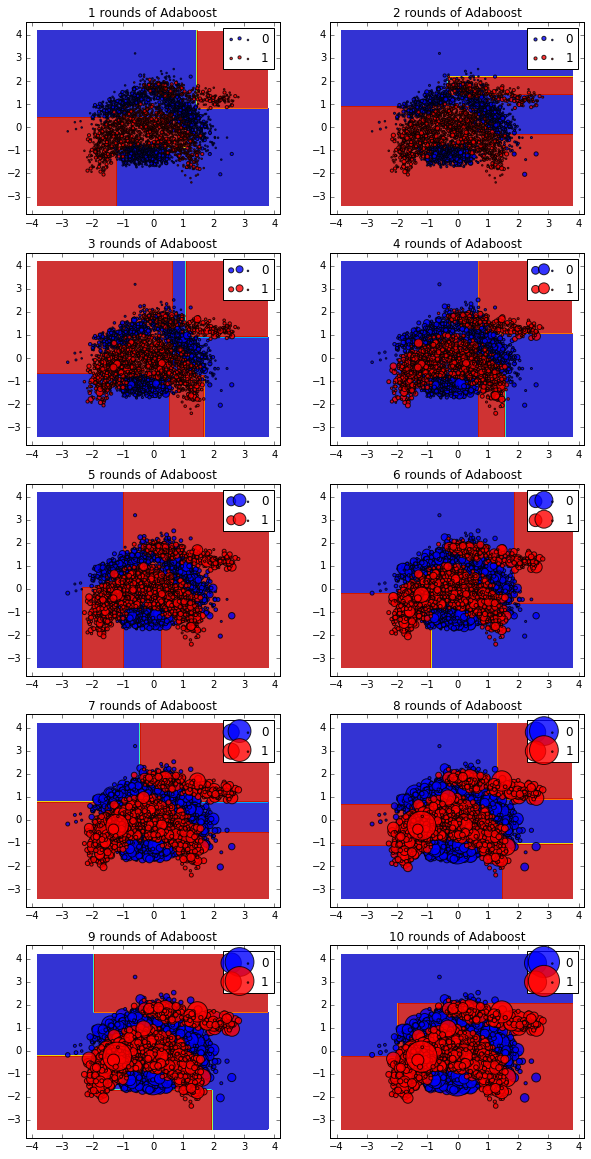

In [18]:
X_train = train.iloc[:,[1,2]].values
y_train = train.iloc[:,0].values

# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# Set and store parameters
max_depth = 3
inds = []
alphas = []
predicts = []
n = len(X_train)
w0 = np.ones(n)/n
# ws.append(w0)

## Training    
figure = plt.subplots(5,2,figsize=(10,20))

for rd in range(10):

    clf = DecisionTreeClassifier(max_depth=max_depth).fit(X_train, y_train, sample_weight=w0)
    predict = clf.predict(X_train)
    # Indicator of misclassification
    ind = predict!=y_train
    # Error fraction
    err = np.mean(np.average(ind, weights=w0, axis=0))
    alpha = np.log((1-err)/err)
    w1 = w0*np.exp(alpha*ind)
    w0 = w1
    inds.append(sum(ind.astype(int)))
    alphas.append(alpha)
    predicts.append(predict)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(5, 2, rd+1)
    cs = plt.contourf(xx, yy, Z,alpha=0.8)
    plt.axis("tight")

    for j, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == j)
        plt.scatter(X[idx,0], X[idx,1], c=color, label=j,
                    cmap=plt.cm.Paired,alpha=0.8,s=w0*8000)
        plt.title('{0} rounds of Adaboost'.format(rd+1))
        plt.axis("tight")
    plt.legend()

In [19]:
[sum(i==y_train) for i in predicts]

[2844, 2113, 2437, 2205, 2076, 2483, 2075, 2476, 1960, 1614]

The red dots tend to have higher weight, and a higher round of Adaboost will make the decision tree tries to cover these red dots but have a few misclassification on the others.

### Plot 
Plot the train and test errors as a function of the number of rounds from 1 through 10. Again, give a brief description of your observations.

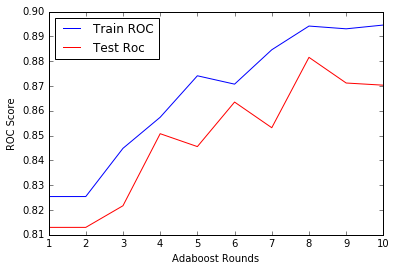

In [20]:
X_train = train.iloc[:,[1,2]].values
y_train = train.iloc[:,0].values

# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# Set and store parameters
max_depth = 3
inds = []
alphas = []
trainPredicts = []
testPredicts = []
trainROC = []
testROC = []
n = len(X_train)
w0 = np.ones(n)/n

## Training    
for rd in range(10):
    clf = DecisionTreeClassifier(max_depth=max_depth).fit(X_train, y_train, sample_weight=w0)
    trainPredict = clf.predict(X_train)
    trainPredicts.append(trainPredict)
    testPredict = clf.predict(X_test)
    testPredicts.append(testPredict)
    # Indicator of misclassification
    ind = trainPredict!=y_train
    # Error fraction
    err = np.mean(np.average(ind, weights=w0, axis=0))
    alpha = np.log((1-err)/err)
    w1 = w0*np.exp(alpha*ind)
    w0 = w1
    inds.append(sum(ind.astype(int)))
    alphas.append(alpha)
    i = 0
    result = np.zeros(len(X_train))
    for j in trainPredicts:
        result = result+alphas[i]*j
        i+=1
    trainROC.append(roc_auc_score(np.sign(result),y_train))
    i = 0
    result = np.zeros(len(X_test))
    for j in testPredicts:
        result = result+alphas[i]*j
        i+=1
    testROC.append(roc_auc_score(np.sign(result),y_test))
plt.plot(range(1,11),trainROC,'b-',label='Train ROC')
plt.plot(range(1,11),testROC,'r-',label='Test Roc')
plt.xlabel('Adaboost Rounds')
plt.ylabel('ROC Score')
plt.legend(loc='best')

The plot convinced the result in 3.1.2, the highest round is not the round with lowest ROC score. The 8th round has the lowest test error.

# Gradient Boosting Machines

In this problem we’ll derive two special cases of the general gradient boosting framework: L2- Boosting and BinomialBoost.

## Bias Function

Consider the regression framework, where $\mathcal Y = \mathbf R$. Suppose our loss function is given by $$\ell(\hat y, y) = \frac{1}{2}(\hat y − y)^2,$$
and at the beginning of the $m$’th round of gradient boosting, we have the function $f_{m−1}(x)$.
Show that the $h_m$ chosen as the next basis function is given by 
$$h_m = argmin_{h\in F}\sum\limits_{i=1}^{n}[(y_i − f_{m−1}(x_i)) − h(x_i)]^2.$$
In other words, at each stage we find the weak prediction function $h_m \in F$ that is the best fit to the residuals from the previous stage. [Hint: Once you understand what’s going on, this is a pretty easy problem.]

> __ANSWER__

> $(g_m)_i=\frac{\partial}{\partial f_{m-1}(x_i)}[\frac{1}{2}(y_i-f_{m-1}(x_i)^2]$

> $=f_{m-1}(x_i)-y_i$

> $h_m = argmin_{h\in F}\sum\limits_{i=1}^{n}[(-g_m)_i − h(x_i)]^2$

> $= argmin_{h\in F}\sum\limits_{i=1}^{n}[(y_i − f_{m−1}(x_i)) − h(x_i)]^2$

## Classification Framework

Now let’s consider the classification framework, where $\mathcal Y = {−1, 1}$. In lecture, we noted that AdaBoost corresponds to forward stagewise additive modeling with the exponential loss, and that the exponential loss not very robust to outliers (i.e. outliers can have a large effect on the final prediction function). Instead, let’s consider instead the logistic loss $$\ell(m) = ln(1 + e^{−m}),$$ 
where $m = yf(x)$ is the margin. Similar to what we did in the $L_2$-Boosting question, write an expression for $h_m$ as an argmin over $\mathcal F$.

> __ANSWER__

> $(g_m)_i=\frac{\partial}{\partial f_{m-1}(x_i)}[\ell(y_i,f_{m-1}(x_i))]$

> $=\frac{\partial}{\partial f_{m-1}(x_i)}[ln(1+e^{-y_if_{m-1}(x_i)})]$

> $=\frac{-y_i}{1+e^{y_if_{m-1}(x_i)}}$

> $h_m = argmin_{h\in F}\sum\limits_{i=1}^{n}[(-g_m)_i − h(x_i)]^2$

> $= argmin_{h\in F}\sum\limits_{i=1}^{n}[\frac{-y_i}{1+e^{y_if_{m-1}(x_i)}}− h(x_i)]^2$

# From Margins to Conditional Probabilities

## Expectation
Write $E_y[\ell(yf(x))|x]$ in terms of $\pi(x)$ and  $\ell(f(x))$. [Hint: Use the fact that $y\in[−1, 1].$]

> __ANSWER:__

> $E_y[\ell(yf(x))|x]=\pi(x)E[\ell f(x)|x]+(1-\pi(x))E[\ell (-f(x))|x]$

> $=\pi(x)\ell(f(x))+(1-\pi(x)\ell(-f(x)))$

## Question 2
Show that the Bayes prediction function $f^∗(x)$ for the exponential loss function $\ell(y,f(x))=e^{−yf(x)}$ is given by $$f^∗(x) = \frac{1}{2}ln(\frac{\pi(x)}{1-\pi(x)})$$ and, given the Bayes prediction function $f^∗$, we can recover the conditional probabilities by $$\pi(x)=\frac{1}{1+e^{−2f^∗(x)}}.$$ 
[Hint: Differentiate the expression in the previous problem with respect to $f(x)$. If this is confusing, you may find it more comforting to change variables a bit: Fix an $x\in X$ . Then write $p=\pi(x)$ and $\hat y=f(x)$. After substituting these into the expression you had for the previous problem, you’ll want to find $\hat y$ that minimizes the expression. Use differential calculus. Once you’ve done it for a single $x$, it’s easy to write the solution as a function of $x$.]

> __ANSWER:__

> Differentiate $E_y[\ell yf(x)|x]$ with respect to $f(x)$,

> $\pi(x)\ell^{'}(f(x))+(1-\pi(x))\ell^{'}(-f(x))=0$

> $\pi(x)[-e^{-f(x)}]+(1-\pi(x))[e^{f(x)}]=0$

> $\frac{\pi(x)}{1-\pi(x)}=e^{2f(x)}$

> $f^*(x)=\frac{1}{2}ln(\frac{\pi(x)}{1-\pi(x)})$

> and $\pi(x)=\frac{e^2f^*(x)}{1+e^2f^*(x)}$

> $\pi(x)=\frac{1}{1+e^{-2f^*(x)}}$

## Question 3
Show that the Bayes prediction function $f^∗(x)$ for the logistic loss function $\ell(y, f(x))=ln(1 + e^{−yf(x)})$ is given by $$f^∗(x) = ln(\frac{\pi(x)}{1 − \pi(x)})$$ and the conditional probabilities are given by $$\pi(x) = \frac{1}{1 + e^{−f^∗(x)}}.$$
Again, we may assume that $\pi(x)\in(0, 1)$.

> __ANSWER__

> $\pi(x)\ell^{'}(f(x))+(1-\pi(x))\ell^{'}(-f(x))=0$

> $(1-\pi(x))e^{f(x)}-\pi(x)=0$

> $f^*(x)=ln\frac{\pi(x)}{1-\pi(x)}$

> And, $\pi(x)=\frac{1}{1+e^{-f^*(x)}}$

## [Optional] 
Show that the Bayes prediction function $f^∗(x)$ for the hinge loss function $\ell(y, f(x))=max (0, 1 − yf(x))$ is given by $$f^∗(x) = sign(\pi(x) −\frac{1}{2}).$$
Note that it is impossible to recover $\pi(x)$ from $f^∗(x)$ in this scenario. However, in practice we work with an empirical risk minimizer, from which we may still be able to recover a reasonable estimate for $\pi(x)$. An early approach to this problem is known as “Platt scaling”: https://en.wikipedia.org/wiki/Platt scaling.

> __ANSWER__

> $E_y[\ell(yf(x))|x]$

> $=\pi(x)\ell(f(x))+(1-\pi(x)\ell(-f(x)))$

> $=\pi(x)max(0,1-f(x))+(1-\pi(x))max(0,1+f(x))$

> $f^*(x)=\begin{cases}
1&if\quad\pi(x)>1-\pi(x)\\
-1& if\quad\pi(x)<1-\pi(x)\\
\end{cases}$

> Therefore, $f^*(x)=sign(\pi(x)-\frac{1}{2})$

# AdaBoost Actually Works

## Exponential bound on the training loss
### Question 1
For any function g into {−1, 1}, show that $1(g(x)\neq y) < exp(−yg(x))$.

> __ANSWER__

> If $g(x)=y$, then $yg(x)=1$, therefore lhs=0 and rhs=$e^{-1}$,

> $\therefore$ lhs<rhs;

> If $g(x)\neq y$, then $yg(x)=-1$, therefore lhs=1 and rhs=$e$,

> $\therefore$ lhs<rhs.

### Question 2 
Use this to show $L(G, D) < Z_T$

> __ANSWER__

> Use the previous statement,$$Z_T=\frac{1}{n}\sum\limits_{i=1}^{n}exp(-y_if_t(x_i))>\frac{1}{n}\sum\limits_{i=1}^{n}1(f_t(x_i)\neq y_i))(1)$$

> And for the rhs of the inequality, the following therom is easy to prove,$$f_t(x_i)\neq y_i\geq 1[sign(f_t(x_i))\neq y_i](2)$$ 

>> as if $sign(f_t(x_i))\neq y_i$, then we also get $f_t(x_i)\neq y_i)$ and lhs=rhs=1,

>> if $sign(f_t(x_i))=y_i$, then rhs=0, and lhs will be either 0 or 1, which give lhs$\geq$rhs.

> We put (2) into (1) and will get $$Z_T=\frac{1}{n}\sum\limits_{i=1}^{n}exp(-y_if_t(x_i))>\frac{1}{n}\sum\limits_{i=1}^{n}1[sign(f_t(x_i))\neq y_i]=L(G,D)$$

### Question 3
Show that $w^{t+1}_i = exp(−y_if_t(x_i))$

> __ANSWER__

> $w_i^{t+1}=w_i^{t}*exp(-\alpha_ty_iG_t(x_i))$

> $=exp(\sum\limits_{j=1}^{t}-\alpha_jy_iG_j(x_i))w_1$

> $=\frac{n}{n}exp(-y_if_t(x_i))$

> $=exp(-y_if_t(x_i))$

### Question 4
Use part 3 to show $\frac{Z_{t+1}}{Z_t}\leq2\sqrt{err_{t+1}(1 − err_{t+1})}$ (Hint: use the definition of weight updates and separate the sum on where Gt is equal to 1 and −1.)

> __ANSWER__

> $\frac{Z_{t+1}}{Z_t}=\frac{\frac{1}{n}\sum\limits_{i=1}^{n}exp(-y_if_{t+1}(x_i))}{\frac{1}{n}\sum\limits_{i=1}^{n}exp(-y_if_t(x_i))}$

> $=\frac{\sum\limits_{i=1}^{n}w_i^{t+2}}{\sum\limits_{i=1}^{n}w_i^{t+1}}$

> $=\frac{\sum\limits_{i=1}^{n}w_i^{t+1}exp(-\alpha_{t+1}y_iG_{t+1}(x_i))}{\sum\limits_{i=1}^{n}w_i^{t+1}}$ 

> $=\frac{\sum\limits^{i=1..n}_{y_iG_{t+1}(x_i)=1}w_i^{t+1}exp(-\alpha_{t+1}y_iG_{t+1}(x_i))+\sum\limits^{j=1..n}_{y_jG_{t+1}(x_j)\neq1}w_j^{t+1}exp(-\alpha_{t+1}y_jG_{t+1}(x_j))}{\sum\limits_{i=1}^{n}w_i^{t+1}}$

> $=\frac{\sum\limits^{i=1..n}_{y_iG_{t+1}(x_i)=1}w_i^{t+1}exp(-\alpha_{t+1})+\sum\limits^{j=1..n}_{y_jG_{t+1}(x_j)\neq1}w_j^{t+1}exp(\alpha_{t+1})}{\sum\limits_{i=1}^{n}w_i^{t+1}}$

> $=\frac{\sum\limits_{i=1}^{n}w_i^{t+1}err_{t+1}exp(-\alpha_{t+1})+\sum\limits_{i=1}^{n}w_i^{t+1}(1-err_{t+1})exp(\alpha_{t+1})}{\sum\limits_{i=1}^{n}w_i^{t+1}}$

> $=err_{t+1}\sqrt{\frac{1-err_{t+1}}{err_{t+1}}}+(1-err_{t+1})\sqrt{\frac{err_{t+1}}{1-err_{t+1}}}$

> $=2\sqrt{err_{t+1}(1-err_{t+1})}$

### Question 5
Show that the function $g(a) = a(1 − a)$ is monotonically increasing on $[0, 1/2]$. Show that $1−a \leq exp(−a)$. And use the assumption on the weak learner to show that $\frac{Z_{t+1}}{Z_t}\leq exp(−2\gamma^2)$

> __ANSWER__

> (1) $\frac{\partial g(a)}{\partial a}=1-2a\geq0,\qquad\forall a\in[0,1/2].$

> (2) $\frac{\partial exp(-a)+a-1}{\partial a}=1-exp(-a)\geq0,\qquad\forall a\in[0,1/2].$

> $\therefore$$1-a\leq exp(-a)$

> (3) $\because err<\frac{1}{2}-\gamma$, where $\frac{1}{2}-\gamma\in[0,1/2]$

> $\therefore\frac{Z_{t+1}}{Z_t}=2\sqrt{err(1-err)}<2\sqrt{(\frac{1}{2}-\gamma)(1-(\frac{1}{2}-\gamma))}$

> $\frac{Z_{t+1}}{Z_t}<\sqrt{1-4\gamma^2}<\sqrt{exp(-4\gamma^2)}=exp(-2\gamma^2)$

### Conclude the proof

> __ANSWER__

> $Z_t=\frac{1}{n}\sum\limits_{i=1}^{n}exp(-y_if_t(x_i))<exp(-2\gamma^2)^{t-1}Z_1=exp(-2\gamma^2(t-1))Z_1$

> And, $Z_1<exp(-2\gamma^2)$

> We get $$Z_t<exp(-2\gamma^2t)$$

> We plug in to 6.1.2 and get $$L(G,D)<Z_t<exp(-2\gamma^2t)$$
> Q.E.D.

# AdaBoost is FSAM With Exponential Loss

## Question 1
Write the first step of the additive model using the exponential loss function. Show that it can be written as:
$$(\alpha_t, G_t) = argmin_{\alpha,G}\sum\limits^n_{i=1}w^t_iexp(−\alpha y_iG(x_i))$$

> __ANSWER__

> $(\alpha_t, G_t) = argmin_{\alpha,G}\sum\limits^n_{i=1}L(y_i,f_{t-1}(x_i)+\alpha G(x_i))$

> $=argmin_{\alpha,G}\sum\limits^n_{i=1}exp(-y_i(f_{t-1}(x_i)+\alpha G(x_i)))$

> $=argmin_{\alpha,G}\sum\limits^n_{i=1}exp(-y_if_{t-1}(x_i)-y_i\alpha G(x_i))$

> $=argmin_{\alpha,G}\sum\limits^n_{i=1}w_i^texp(-y_i\alpha G(x_i))$

> where $w_i^t=exp(-y_if_{t-1}(x_i))$

## Question 2
Show that for fixed positive alpha:$$G_t = argmin_G\sum\limits_{i=1}^nw_i^t1(G(x_i)\neq y_i)$$(Hint: split the sum in part 1 for $y_i = G(x_i)$ and otherwise.)

> __ANSWER__

> $(\alpha_t, G_t)=argmin_{\alpha,G}\sum\limits_{i=1}^{n}w_i^texp(\alpha y_iG(x_i))$

> $=argmin_{\alpha,G}[e^{-\alpha}\sum\limits_{y_i=G(x_i)}w_i^t+e^{\alpha}\sum\limits_{y_i\neq G(x_i)}w_i^t]$

> $=argmin_{\alpha,G}[e^{-\alpha}\sum\limits_{i=1}^{n}w_i^t+(e^{\alpha}-e^{-\alpha})\sum\limits_{y_i\neq G(x_i)}w_i^t1(G(x_i)\neq y_i)]$

> $\therefore G_t = argmin_G\sum\limits_{i=1}^nw_i^t1(G(x_i)\neq y_i)$

## Question 3
Plug this $G_t$ back into the first equation and solve for $\alpha$ to obtain $$\alpha_t=\frac{1}{2}log(\frac{1}{err_t}−1).$$

> __ANSWER__

> Plug $G_t$ back to (6) and solve for $\alpha$ and we can get,

> $-e^{-\alpha}\sum\limits_{i=1}^{n}w_i^t+(e^{\alpha}+e^{\alpha})\sum\limits_{i=1}^nw_i^t1(G_t(x_i)\neq y_i)=0$

> $\alpha = \frac{1}{2}(log(\sum\limits_{i=1}^{n}w_i^t-\sum\limits_{i=1}^nw_i^t1(G_t(x_i)\neq y_i))-log(\sum\limits_{i=1}^nw_i^t1(G_t(x_i)\neq y_i)))$

> $=\frac{1}{2}log(\frac{\sum\limits_{i=1}^{n}w_i^t-\sum\limits_{i=1}^nw_i^t1(G_t(x_i)\neq y_i)}{\sum\limits_{i=1}^nw_i^t1(G_t(x_i)\neq y_i))})$

> $=\frac{1}{2}log(\frac{1}{err_t}-1)$

> where $err_t=\frac{\sum\limits_{i=1}^nw_i^t1(G_t(x_i)\neq y_i))}{\sum\limits_{i=1}^{n}w_i^t}$

## Question 4
Show that the weight iterations are given by: $$w_{i}^{t+1}=w_i^texp(−\alpha_ty_iG_t(x_i))$$
And conclude the equivalence.

> __ANSWER__

> We can get the new update function for $f_t(x)$ as,

> $f_t(x)=f_{t-1}(x)+\alpha_tG_t(x)$

> And the update function for weight will be,

> $w_i^{t+1}=exp(-y_if_{t}(x_i))$

> $=exp(-y_i(f_{t-1}(x_i)+\alpha_tG_t(x)))$

> $=w_i^texp(-\alpha_ty_iG_t(x_i))$